# Shelly-Ann Duncan
# 11/30/22
# Hypothesis Testing with Insurance Data (Core)

# We have been asked to use our hypothesis testing skills to answer the following questions:

* - Q1. Do smokers have higher insurance charges than non-smokers?
* - Q2. Are men more likely to smoke than women?
* - Q3. Do different regions have different charges, on average?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy

In [2]:
# load data
url = 'Data/insurance - insurance.csv'
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## State the Hypothesis & Null Hypothesis


- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non-smokers
- $H_A$ (Alternative Hypothesis): Smokers have higher insurance charges than non-smokers

## Determine the correct test to perform
- Type of Data? Numeric
- How many groups/samples? 2 samples(smokers, non-smokers)
- Therefore which test is appropriate? sample T test

## Visualize and separate data for hypothesis
- What column is the target? charges
- What column determines the group? smoker

In [3]:
# check the columns that contain the charges
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [4]:
# check the column that contains info on smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
# create filters for smokers and non smokers 
smoker = df.loc[df['smoker'] == 'yes'].copy()
non_smoker = df.loc[df['smoker'] == 'no'].copy()

In [6]:
# define the feature of interest
smoker_charges = smoker['charges']
nonsmoker_charges = non_smoker['charges']
print(smoker_charges)
print()
print()
print(nonsmoker_charges)

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


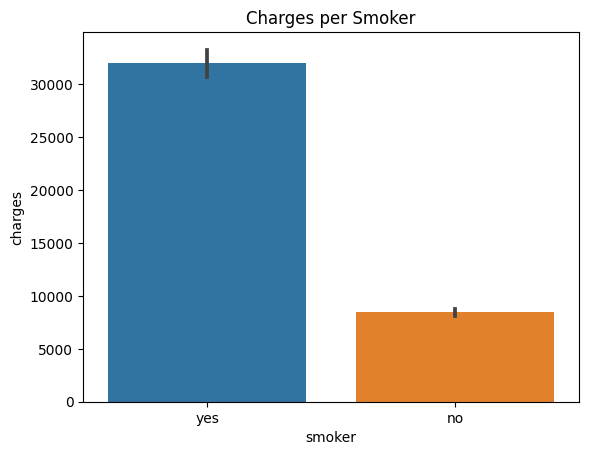

In [45]:
# visulaize the group
ax = sns.barplot(data = df, x = 'smoker', y = 'charges')
ax.set_title('Charges per Smoker');

## Check for outliers

In [8]:
# check for outliers in the smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [9]:
# check for outliers in the non smoker group
zscores= stats.zscore(nonsmoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [14]:
len(smoker_charges), len(nonsmoker_charges)

(274, 1040)

In [10]:
# remove outlier for non smoker group
nonsmoker_charges = nonsmoker_charges[(np.abs(stats.zscore(nonsmoker_charges)) < 3)]

## Check for normality

In [12]:
# test the smoker group for nomality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
# test the non_smoker group for normality
result_nonsmoker_charges = stats.normaltest(nonsmoker_charges)
result_nonsmoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

## Check for equal variances

In [17]:
# test for equal variance
result = stats.levene(smoker_charges, nonsmoker_charges)
result.pvalue <0.05

True

In [18]:
# use and if-else statement
if result.pvalue <0.05:
    print('The group DO NOT have equal variances')
else:
    print('The group DO have equal variances')

The group DO NOT have equal variances


## Final hypothesis test

In [20]:
# run final hypothesis test
results = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
results.pvalue <0.05

True

In [21]:
# make a plot or calculate or calculate group mean to know which group had more/less
smoker_charges.mean()

32050.23183153284

In [22]:
nonsmoker_charges.mean()

7939.8608446721155

### Final conclusion
- p < alpha so we rejest the null hypothesis and we support the alternate hypothesis.
- Smokers have higher insurance charges than non smokers.

# Q2. Are men more likely to smoke than women?

## State the hypothesis and null hypothesis
- $H_0$ (Null Hypothesis): Men are not more likey to smoke than women.
- $H_A$ (Alternative Hypothesis) : Men are more likely to smoke than women.    

## Determine the correct test to perform
- Type of Data? Categorical
- How many groups/samples? 2 samples(men, women)
- Therefore which test is appropriate? Chi-Square

## Visualize and separate data for hypothesis
- What column is the target? smoker
- What column determines the group? sex

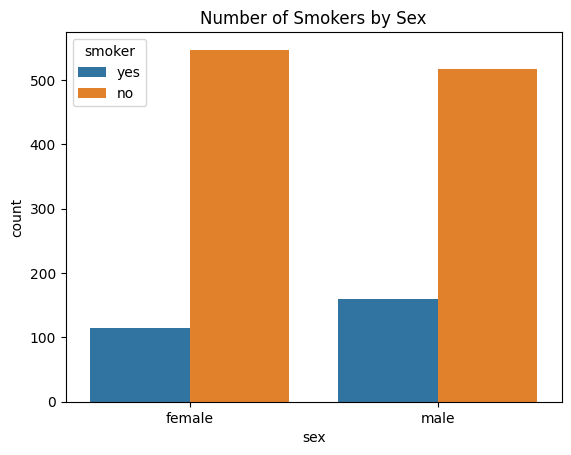

In [44]:
# visualize the smokers/non smokers by sex
ax = sns.countplot(data = df, x ='sex', hue = 'smoker',)
ax.set_title('Number of Smokers by Sex');

In [26]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [28]:
# run the test and save the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result # this labels the results

In [29]:
# what is the p value
print(p)
p < 0.05

0.006548143503580696


True

### final conclusion
* p < alpha so we reject the null hypothesis and we support the alternate hypothesis.
* Men are more likely to smoke than women.

# Q3. Do different regions have different charges, on average?

## State the hypothesis and the null hypothesis
* 𝐻0  (Null Hypothesis): Different regions do not have different charges on average.
* 𝐻𝐴  (Alternative Hypothesis) : Different regions have different charges.

## Determine the correct test to perform
* Type of Data? Categorical
* How many groups/samples? More than 2
* Therefore which test is appropriate? Chi-Square

## Visualize and separate data for hypothesis
- What column is the target? regions
- What column determines the group? charges

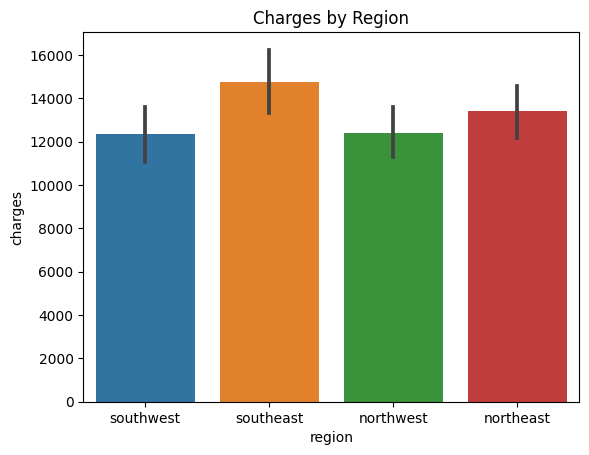

In [38]:
# visualize the regions by charges
ax = sns.barplot(data = df, x = 'region', y = 'charges',)
ax.set_title('Charges by Region');

In [47]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['charges'], df['region'])
table

region,northeast,northwest,southeast,southwest
charges,,,,
1121.87390,0,0,1,0
1131.50660,0,0,1,0
1135.94070,0,0,1,0
1136.39940,0,0,1,0
1137.01100,0,0,1,0
...,...,...,...,...
55135.40209,0,1,0,0
58571.07448,1,0,0,0
60021.39897,0,1,0,0


In [48]:
# run the test and save the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [49]:
# what is the p value
print(p)
p < 0.05

0.4703353426605913


False

## Final conclusion
* p > alpha so we support the null hypothesis and reject the alternative hypothesis
* Different regions do not have have different charges on average.